# Problem 1
 Ecologists tested the grazing pressure of green crabs on clams. They constructed cages and planted 300 clams in each cage. Two days later, they counted the number of remaining clams and recorded the data in the data below.

Number of Crabs, Number of Clams Remaining
2,	137
4,	70
2,	184
5,	0
4,	35
0,	297
3,	122
5,	1
1,	253
3,	150

In [27]:
from cProfile import label
from statistics import linear_regression

import numpy as np
from adodbapi.setup import DESCRIPTION
from pandas.core.common import random_state
from requests.packages import target

from KNN_algorithm import training_accuracy, n_neighbors

data = np.array([
    [2, 137],
    [4, 70],
    [2, 184],
    [5, 0],
    [4, 35],
    [0, 297],
    [3, 122],
    [5, 1],
    [1, 253],
    [3, 150]
])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[:, 0].reshape(-1,1)
y = data[:, 1]
print(X)
print(y)

[[2]
 [4]
 [2]
 [5]
 [4]
 [0]
 [3]
 [5]
 [1]
 [3]]
[137  70 184   0  35 297 122   1 253 150]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)
lr = LinearRegression().fit(X_train, y_train)
print("Model accuracy: {}".format(lr.score(X, y)))

Model accuracy: 0.9575496121104143


# Problem 2
Now, let’s step up our game by working with a dataset that has multiple predictors. Imagine you’re in charge of a marketing team, and you need to predict sales based on advertising spend across different media channels — TV, radio, and newspaper.

This type of problem is common in marketing analytics and can help you understand how different factors collectively influence an outcome.
| TV Spend ($) | Radio Spend ($) | Newspaper Spend ($) | Sales ($) |
|--------------|-----------------|---------------------|-----------|
| 230.1        | 37.8            | 69.2                | 22.1      |
| 44.5         | 39.3            | 45.1                | 10.4      |
| 17.2         | 45.9            | 69.3                | 9.3       |
| 151.5        | 41.3            | 58.5                | 18.5      |
| 180.8        | 10.8            | 58.4                | 12.9      |  

In [30]:
data = [
    [230.1, 37.8, 69.2, 22.1],
    [44.5, 39.3, 45.1, 10.4],
    [17.2, 45.9, 69.3, 9.3],
    [151.5, 41.3, 58.5, 18.5],
    [180.8, 10.8, 58.4, 12.9]
]
data = np.array(data)
X = data[:, :3]
y = data[:, 3]
print (X)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
[22.1 10.4  9.3 18.5 12.9]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("the accuracy of the linear regression model is: {}".format(lr.score(X, y)))

the accuracy of the linear regression model is: 0.9605547250799181


### classifying  the iris dataset.


In [45]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.get("target"))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [52]:
X = iris_dataset.get("data")
y = iris_dataset.get('target')
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=110).fit(X_train, y_train)

In [86]:
print("Model accuracy score: {}".format(knc.score(X_test, y_test)))

Model accuracy score: 0.2894736842105263


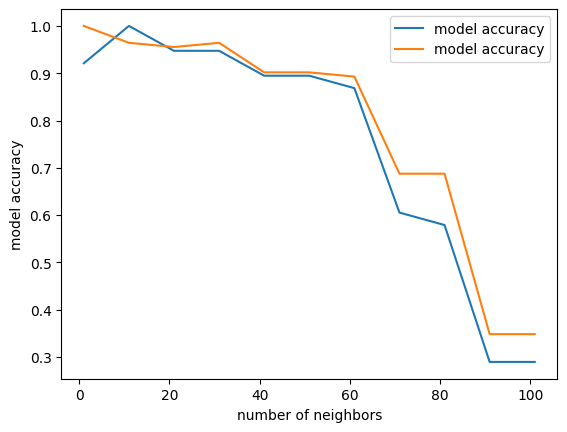

In [90]:
import matplotlib.pyplot as plt
testing_scores = []
training_scores = []
n_neighbors = range(1, 110, 10)
for neighbours in n_neighbors:
    knc = KNeighborsClassifier(n_neighbors=neighbours).fit(X_train, y_train)
    testing_scores.append(knc.score(X_test, y_test))
    training_scores.append(knc.score(X_train, y_train))

plt.plot(n_neighbors, testing_scores, label='model accuracy')
plt.plot(n_neighbors, training_scores, label='model accuracy')
plt.ylabel("model accuracy")
plt.xlabel("number of neighbors")
plt.legend()